In [17]:
%load_ext autoreload
%autoreload 1
%aimport resource_networks
%aimport network_manipulation 


from resource_networks import *
from network_manipulation import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["axes.grid"] = True
plt.rcParams["font.size"] = 12
%matplotlib inline

import scipy

# import plotly.graph_objs as go
# import plotly.express as px

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from scipy.linalg import null_space

In [19]:
%%html
<style>
/* Any CSS style can go in here. */
.dataframe th {
    font-size: 14px;
}
.dataframe td {
    font-size: 14px;
}
</style>


In [33]:
n = 4
G2 = ResourceDiGraph(nx.fast_gnp_random_graph(n, 0.4, directed=True))
sim = G2.run_simulation(np.random.randint(10, 13, size=n), 40)
plot_simulation(G2, sim)
# sim.arr

interactive(children=(IntSlider(value=0, description='№ of iteration', max=39), Output()), _dom_classes=('widg…

In [44]:
sim = G2.run_simulation([10, 10, 10, 10], 150)
plot_simulation(G2, sim)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=149), Output()), _dom_classes=('wid…

In [53]:
nx.to_numpy_array(G2.G, dtype=int)[[0, 2, 1, 3]][:, [0, 2, 1, 3]]

array([[0, 0, 2, 0],
       [0, 0, 0, 4],
       [3, 2, 0, 0],
       [1, 5, 0, 0]])

In [70]:
ig = np.array([
       [0, 0, 2, 0], #если заменить 2 на 1, то аттрактором станет другая вершина!
       [0, 0, 0, 4], 
       [3, 2, 0, 0],
       [1, 5, 0, 0]])
interesting_graph = ResourceDiGraph(nx.from_numpy_array(
    ig,
    create_using=nx.DiGraph))
sim = interesting_graph.run_simulation([10, 10, 6, 12], 150)
plot_simulation(interesting_graph, sim)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=149), Output()), _dom_classes=('wid…

In [38]:
import pickle
with open('interesting_networks/long_transfer.pickle', 'wb') as f:
    pickle.dump(G2, f)

In [43]:
with open('interesting_networks/long_transfer.pickle', 'rb') as f:
    some_network = pickle.load(f)

In [11]:
M = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [3, 1, 1, 1, 1],
    [4, 1, 1, 1, 1],
    [5, 1, 1, 1, 1]
])
G = ResourceDiGraph(nx.from_numpy_matrix(M, create_using=nx.DiGraph))
sim = G.run_simulation([0, 40, 0, 0, 0], 32)
plot_simulation(G, sim, scale=1.5)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=31), Output()), _dom_classes=('widg…

In [12]:
G.stochastic_matrix()

array([[0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [0.42857143, 0.14285714, 0.14285714, 0.14285714, 0.14285714],
       [0.5       , 0.125     , 0.125     , 0.125     , 0.125     ],
       [0.55555556, 0.11111111, 0.11111111, 0.11111111, 0.11111111]])

### Simple network

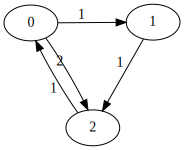

In [56]:
G = ResourceDiGraph(nx.from_numpy_array(np.array([
    [0, 1, 2],
    [0, 0, 1],
    [1, 0, 0]
]), create_using=nx.DiGraph))
G.plot()

In [57]:
null_space((G.stochastic_matrix() - np.eye(3)).T)

array([[-0.6882472 ],
       [-0.22941573],
       [-0.6882472 ]])

In [58]:
sim = G.run_simulation([1, 0, 0], 40)
plot_simulation(G, sim)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=39), Output()), _dom_classes=('widg…

In [59]:
prot = simple_protocol(sim)
# prot.diff().abs().sum(axis=1).diff()
prot

,0,1,2
t,,,
0,1.000000,0.000000,0.000000
1,0.000000,0.333333,0.666667
2,0.666667,0.000000,0.333333
3,0.333333,0.222222,0.444444
4,0.444444,0.111111,0.444444
5,0.444444,0.148148,0.407407
6,0.407407,0.148148,0.444444
7,0.444444,0.135802,0.419753
8,0.419753,0.148148,0.432099


---

---